<a href="https://colab.research.google.com/github/G4trhl/prac_class/blob/main/team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 준비 과정
    

  # 패키지 불러오기 
  library(data.table)
  library(magrittr)
  library(ggplot2)
  library(plotly)
  # library(factoextra)


  dt_train = fread('data/train.csv')


  names(dt_train) = c('num', 'date_time', '전력사용량', '기온', '풍속', '습도', '강수량', '일조', '비전기냉방설비운영', '태양광보유')


  # 날짜/시간 변수 형식 변환 및 파생 변수 생성
  dt_train[, date_time := as.POSIXct(date_time, tz='', format='%F %H')]
  dt_train[, `:=`(date = as.Date(date_time, tz=''),
                  hour = as.factor(format(date_time, format='%H')),
                  dow  = as.factor(format(date_time, format='%u')))]

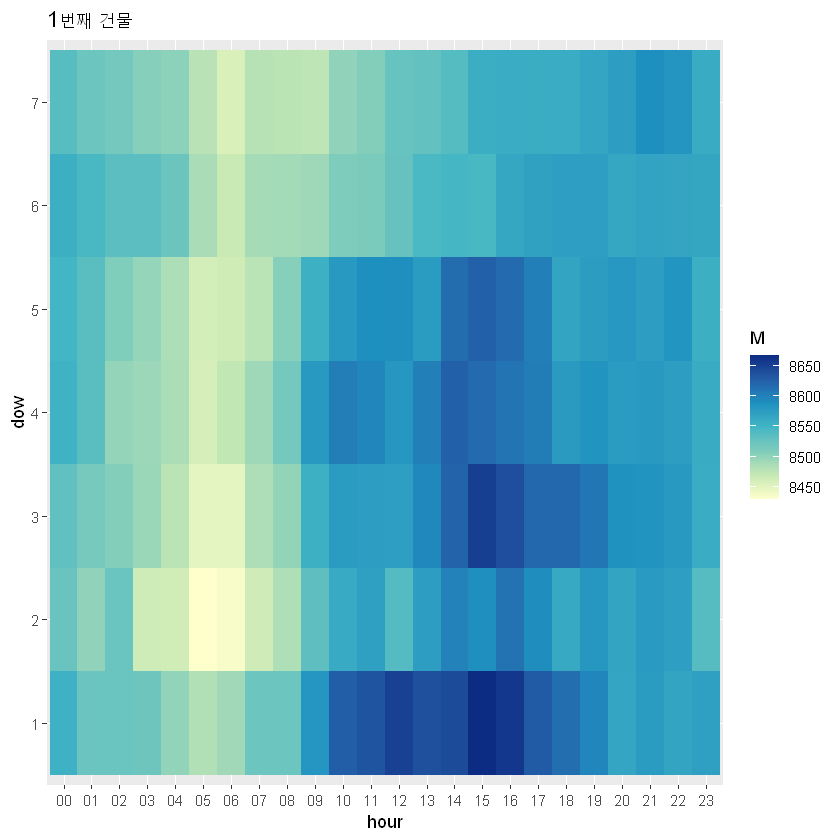

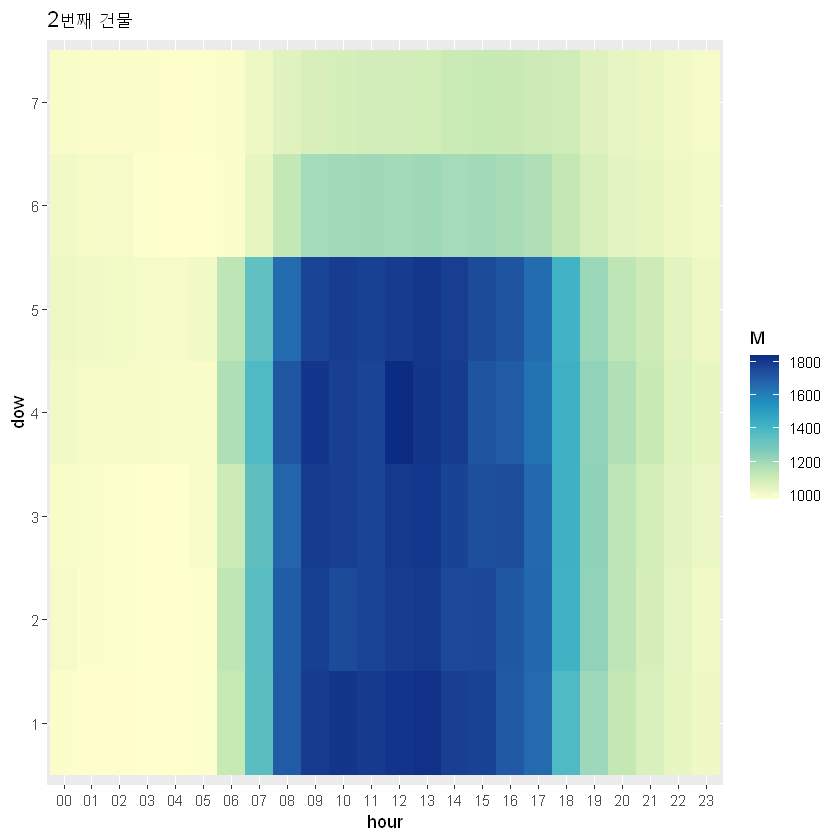

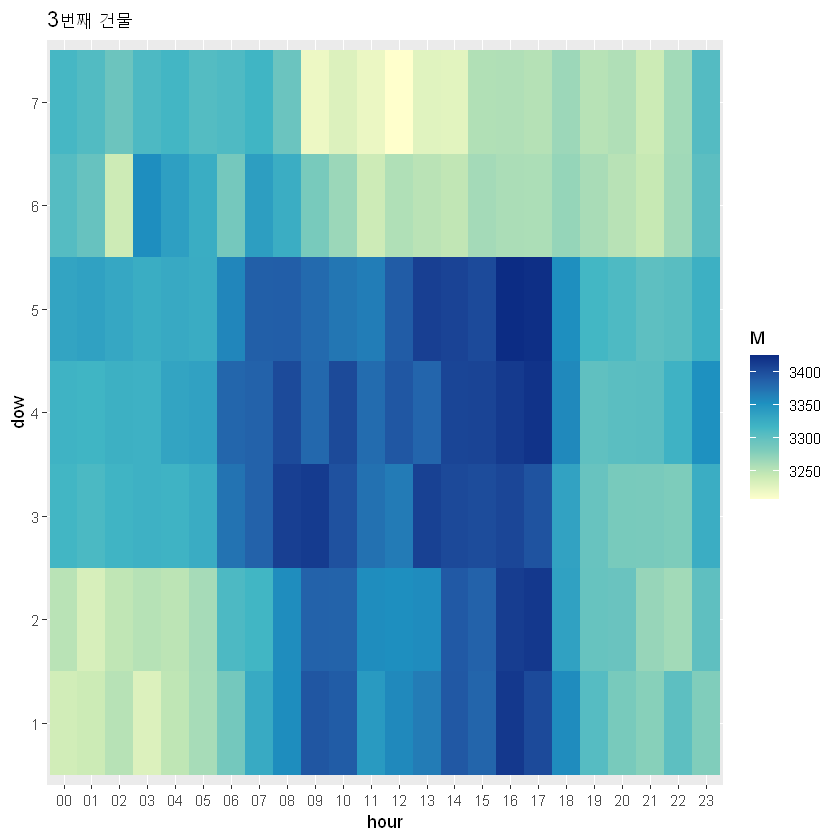

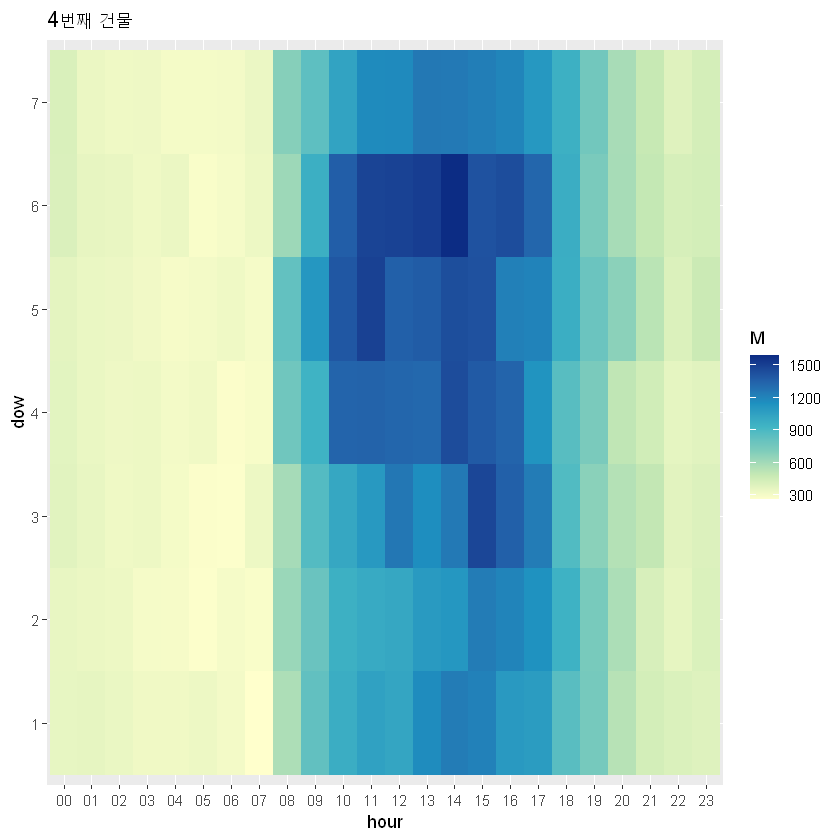

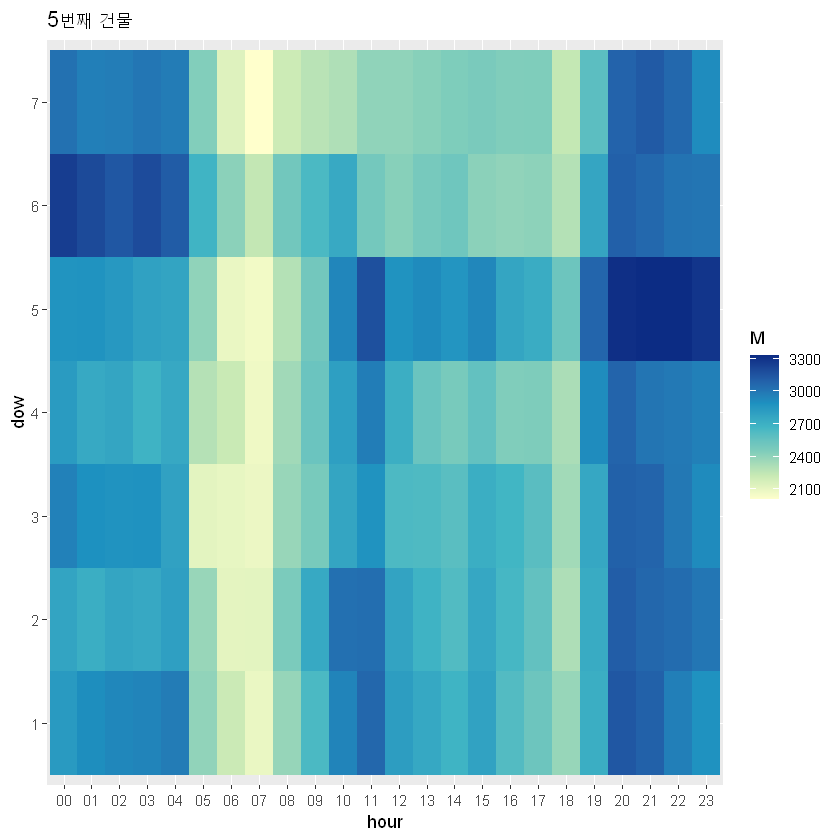

In [ ]:
  # 특정 건물의 요일/시간별 전력사용량
  for ( i in 1:5){
    p = dt_train[num==i, .(M = median(전력사용량)), by=.(hour, dow)] %>% 
    ggplot(aes(hour, dow, fill=M)) + 
    geom_tile() +
    scale_fill_distiller(palette='YlGnBu', direction=1) +
    ggtitle(paste0(i, '번째 건물'))
    plot(p)
  }
